# Классификация - и снова в бой!


Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основные методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, необходимой предобработки, feature engineering и поиск лучшего варианта, который даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

In [104]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = TEXT_COLOR
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.markersize'] = 15
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

sns.set_style('darkgrid')

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


Cмотрим информацию


In [105]:
df=pd.read_csv('heart_cleveland_upload.csv')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [107]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [108]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [109]:
#Переменная Condition отвечает за наличие заболевания и является целевой переменной
df.condition.value_counts()

condition
0    160
1    137
Name: count, dtype: int64

Смотрим на точность модели

In [110]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df.condition, random_state=RANDOM_SEED)

model = LogisticRegression(random_state=RANDOM_SEED)
y_train = df_train.pop('condition')
y_test = df_test.pop('condition')

model.fit(df_train, y_train)
y_pred = model.predict(df_test)

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        48
           1       0.94      0.81      0.87        42

    accuracy                           0.89        90
   macro avg       0.90      0.88      0.89        90
weighted avg       0.90      0.89      0.89        90



Видно, что усредненная полнота предсказаний (recall) равна 0.87 и отсутствие промахов (precision) равно 0.88 при предсказании болезни сердца. В данном случае Recall важнее для разраотчика, так как важно не пропустить больного пациента.

<Axes: >

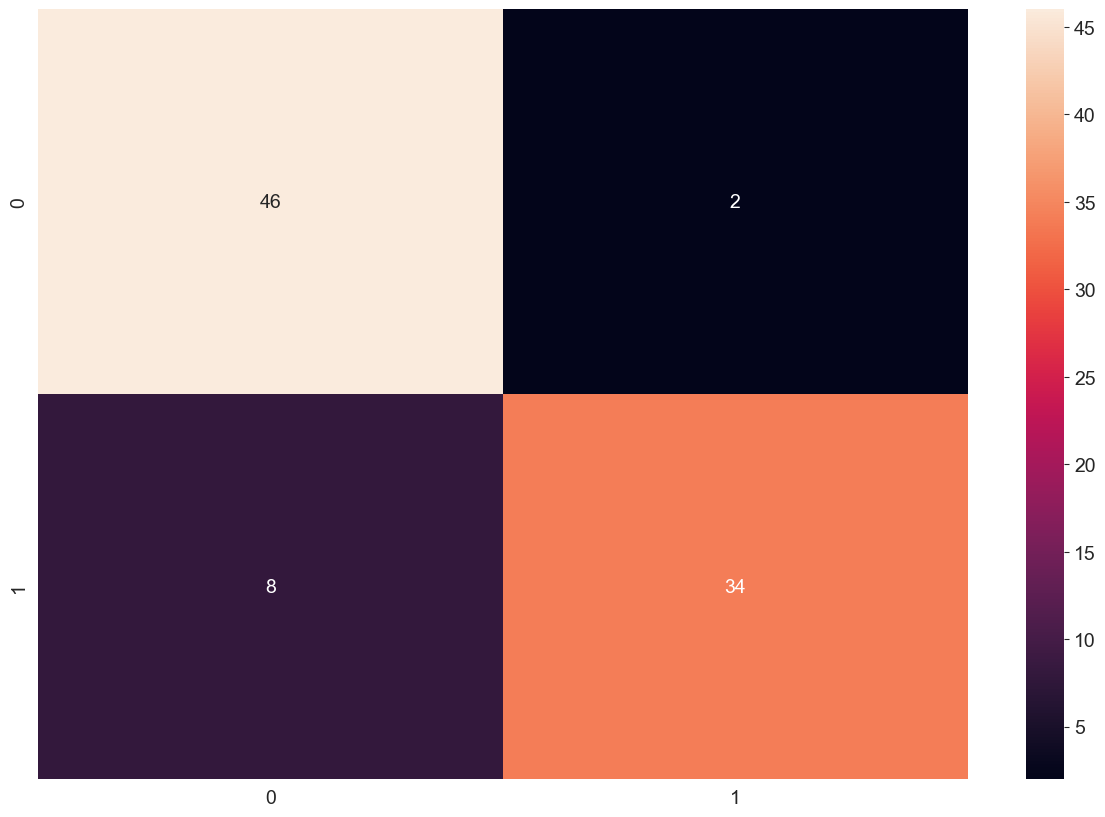

In [112]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True)

Построим roc_curve & pr_curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


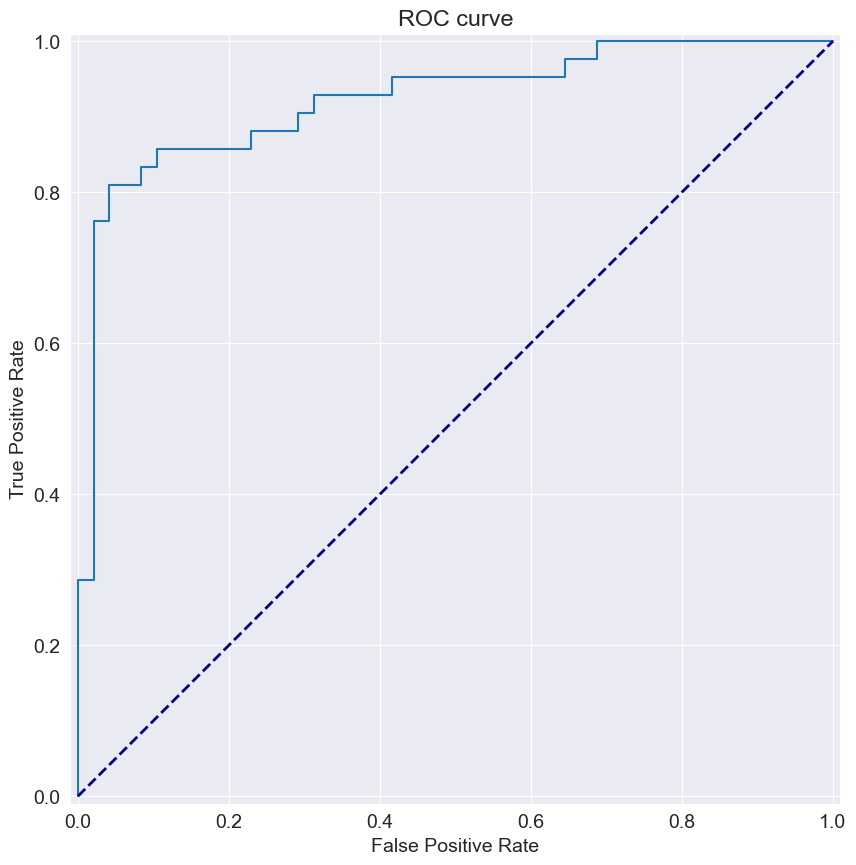

In [113]:

y_pred_prob = model.predict_proba(df_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

pl = RocCurveDisplay(fpr=fpr, tpr=tpr)

pl.plot()

pl.ax_.set_title('ROC curve')
pl.ax_.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
pl.ax_.get_legend().remove() 


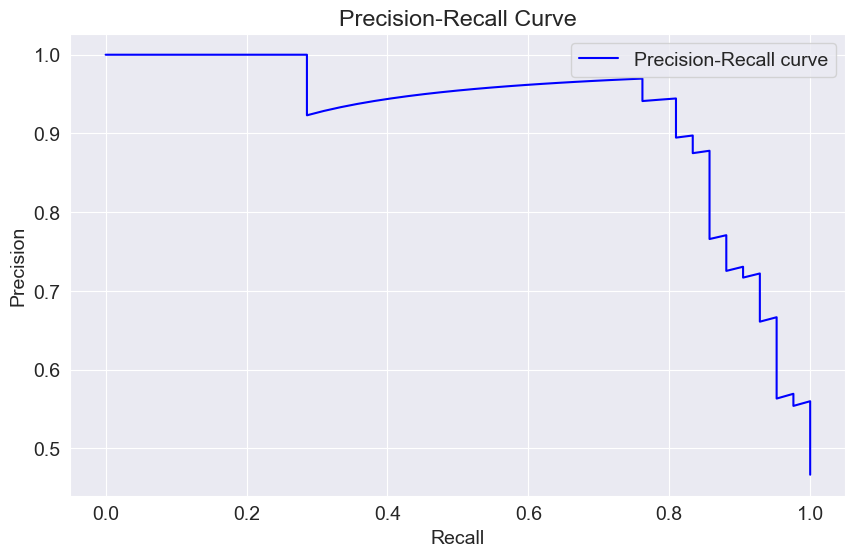

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

y_pred_prob = model.predict_proba(df_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Смотрим на переменные отдельно

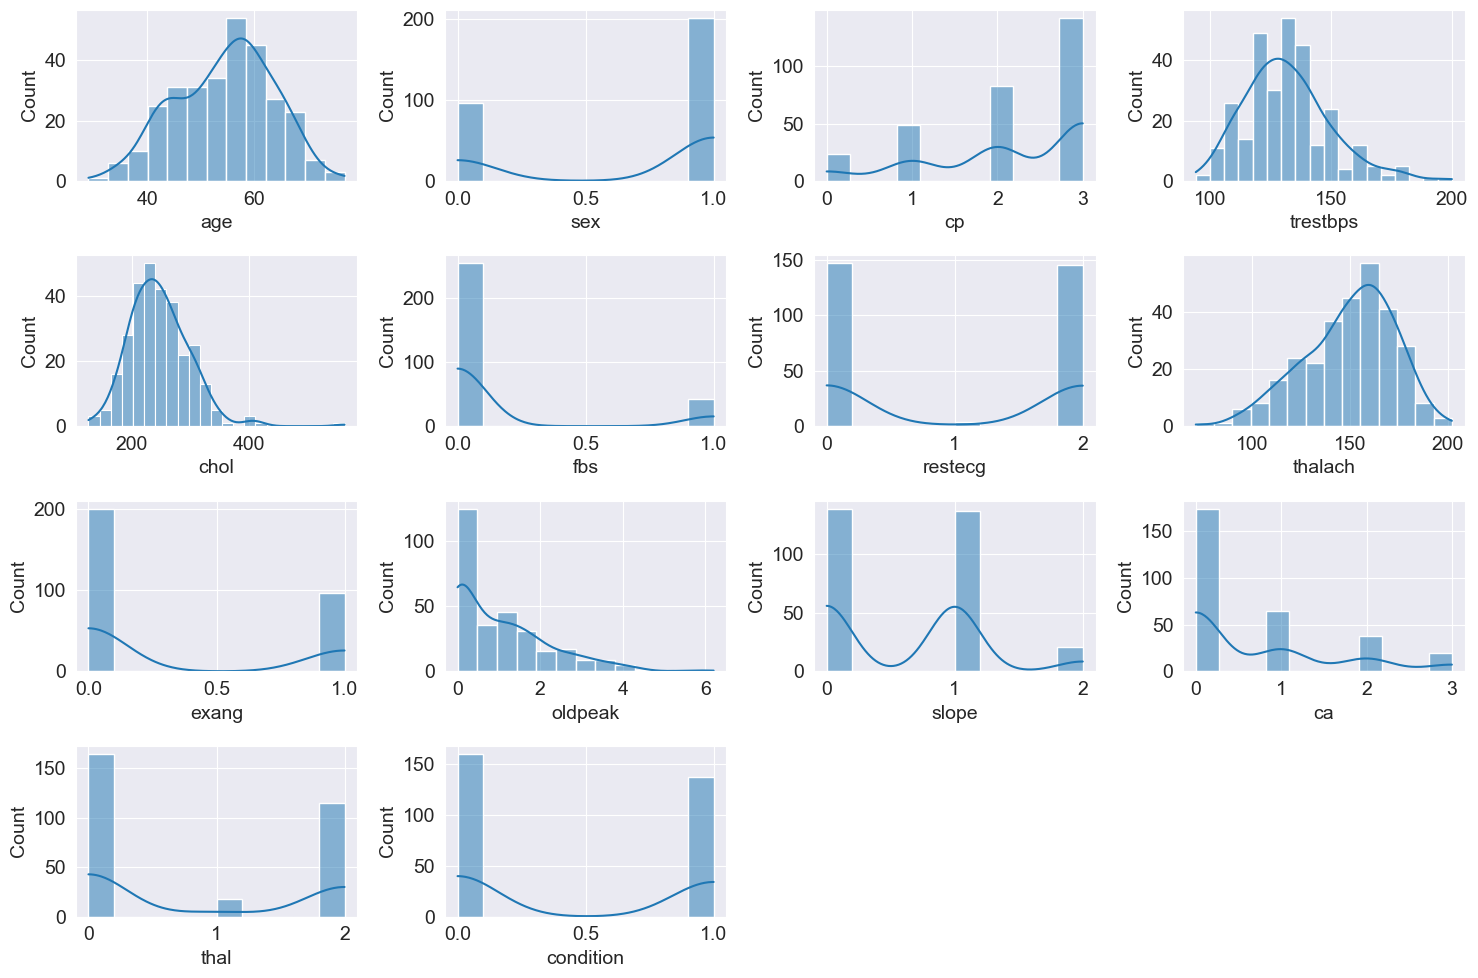

In [115]:
for i, col in enumerate(df.columns):
    ax = plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=col, ax=ax, kde = True)
    plt.tight_layout()

Сводим переменные age, trestbps, chol, thalach и oldpeak к нормальному распределению, так как они больше всего на него похожи.

In [116]:
pt = PowerTransformer(standardize=True)
age_array = np.array(df.age)
age = pt.fit_transform(age_array.reshape(-1,1))
df.age = age

pt = PowerTransformer(standardize=True)
trestbps_array = np.array(df.trestbps)
trestbps = pt.fit_transform(trestbps_array.reshape(-1,1))
df.trestbps = trestbps

pt = PowerTransformer(standardize=True)
chol_array = np.array(df.chol)
chol = pt.fit_transform(chol_array.reshape(-1,1))
df.chol = chol

pt = PowerTransformer(standardize=True)
thalach_array = np.array(df.thalach)
thalach = pt.fit_transform(thalach_array.reshape(-1,1))
df.thalach = thalach

pt = PowerTransformer(standardize=True)
oldpeak_array = np.array(df.oldpeak)
oldpeak = pt.fit_transform(oldpeak_array.reshape(-1,1))
df.oldpeak = oldpeak

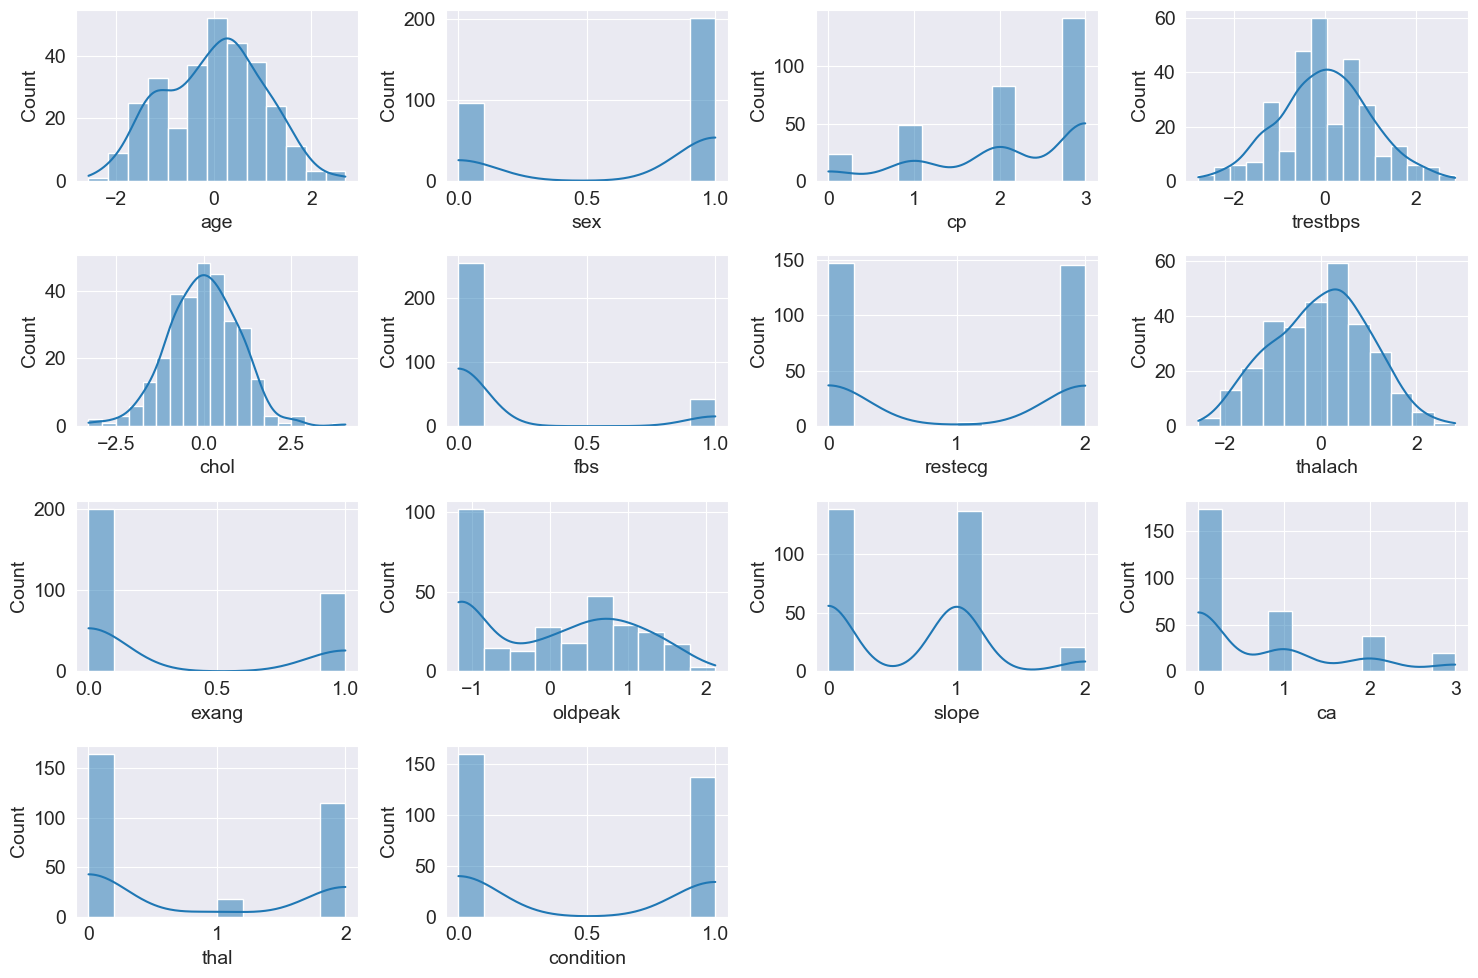

In [117]:
for i, col in enumerate(df.columns):
    ax = plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=col, ax=ax, kde = True)
    plt.tight_layout()

In [118]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df.condition, random_state=RANDOM_SEED)

model = LogisticRegression(random_state=RANDOM_SEED)
y_train = df_train.pop('condition')
y_test = df_test.pop('condition')

model.fit(df_train, y_train)
y_pred = model.predict(df_test)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        48
           1       0.95      0.83      0.89        42

    accuracy                           0.90        90
   macro avg       0.91      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



Модель с предобработкой показывает лучшие результаты. Нам удалось поднять recall и precicion на 0.03 единицы.